In [ ]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the CSV file
data = pd.read_csv('iphone.csv')  # Replace with your filename

# Function to clean and normalize text
def clean_text(text):
    # Check if the text is a string before applying regex
    if isinstance(text, str):
        text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
        text = text.lower()  # Convert text to lowercase
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    else:
        # Handle non-string values (e.g., return empty string or NaN)
        return ''

# Apply text cleaning
data['cleaned_review'] = data['reviewDescription'].apply(clean_text)

# Tokenize the cleaned text
data['tokenized_review'] = data['cleaned_review'].apply(lambda x: nltk.word_tokenize(x))

# Vectorizing the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# Apply the functions to your DataFrame
data['subjectivity'] = data['cleaned_review'].apply(get_subjectivity)
data['polarity'] = data['cleaned_review'].apply(get_polarity)

# Display the DataFrame with subjectivity and polarity scores
print(data[['reviewDescription', 'subjectivity', 'polarity']])

                                      reviewDescription  subjectivity  \
0     Every thing is good about iPhones, there's not...      0.628571   
1     It look so fabulous, I am android user switche...      0.656944   
2     I tried to flip camera while recording but no ...      0.343056   
3                                          100% genuine      0.500000   
4            Happy to get the iPhone 13 in Amazon offer      1.000000   
...                                                 ...           ...   
3057  Useless phon never buy this heat n useless cam...      0.200000   
3058  iam not happy with this product why because ch...      0.550000   
3059                                         Good phone      0.600000   
3060  While charging mobile it's getting so hot even...      0.525000   
3061  Battery power is be very bad need to chat on d...      0.288889   

      polarity  
0     0.078571  
1     0.401389  
2    -0.058333  
3     0.400000  
4     0.800000  
...        ...  
3057

In [ ]:
data.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,cleaned_review,tokenized_review,subjectivity,polarity
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,every thing good iphones theres nothing compar...,"[every, thing, good, iphones, theres, nothing,...",0.628571,0.078571
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,look fabulous android user switched apple perf...,"[look, fabulous, android, user, switched, appl...",0.656944,0.401389
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,tried flip camera recording facility added pau...,"[tried, flip, camera, recording, facility, add...",0.343056,-0.058333
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,genuine,[genuine],0.500000,0.400000
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,happy get iphone amazon offer,"[happy, get, iphone, amazon, offer]",1.000000,0.800000


In [ ]:
data.describe()

,ratingScore,subjectivity,polarity
count,3062.000000,3062.000000,3062.000000
mean,3.758981,0.490497,0.292075
std,1.579033,0.294514,0.355158
min,1.000000,0.000000,-1.000000
25%,3.000000,0.303795,0.000000
50%,5.000000,0.540000,0.280000
75%,5.000000,0.666061,0.558333
max,5.000000,1.000000,1.000000


Country Frequency:
 country
India                   2229
United States            579
Japan                    158
United Arab Emirates      80
Mexico                    11
Canada                     4
Egypt                      1
Name: count, dtype: int64


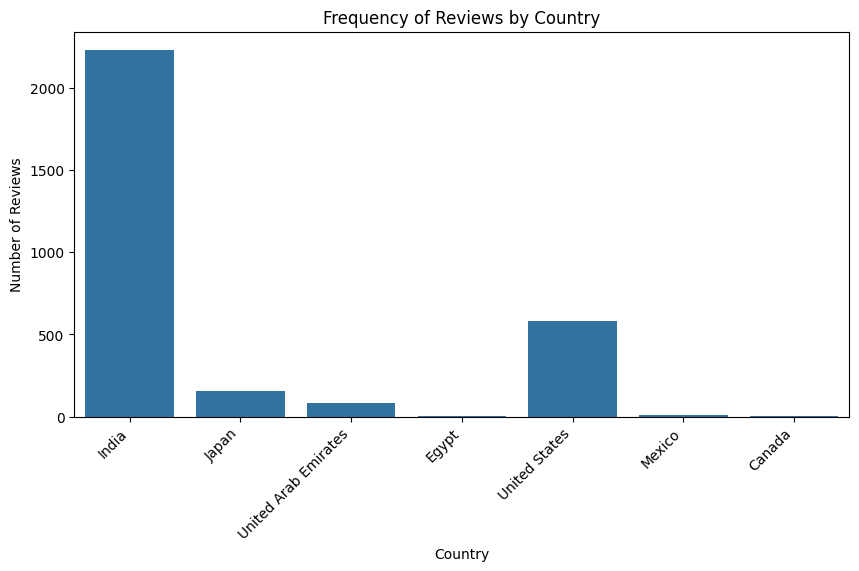


isVerified Frequency:
 isVerified
True     2850
False     212
Name: count, dtype: int64


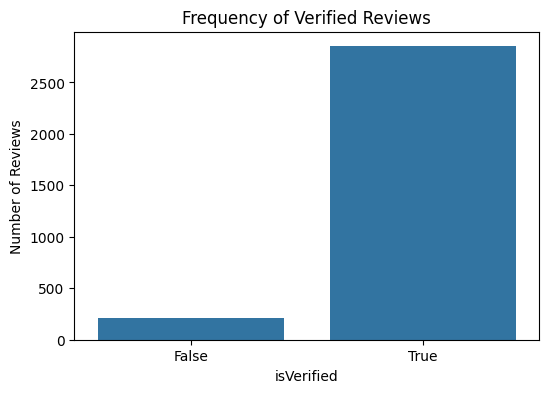


Variant Frequency:
 variant
Colour: BlueSize: 128 GB                                  300
Colour: MidnightSize: 128 GB                              242
Colour: StarlightSize: 128 GB                             227
Colour: GreenSize: 128 GB                                 188
Colour: PinkSize: 128 GB                                  185
                                                         ... 
Service Provider: GSM CarriersColor: PurpleSize: 128GB      1
Colour: MidnightSize: 512 GB                                1
Service Provider: VerizonColor: BlueSize: 256GB             1
Service Provider: AT&TColor: StarlightSize: 256GB           1
Service Provider: VerizonColor: StarlightSize: 256GB        1
Name: count, Length: 86, dtype: int64


In [ ]:
# prompt: perform eda on the given dataset: make about frequency of country, isVerified, and variant

import matplotlib.pyplot as plt
# Frequency of Country
country_counts = data['country'].value_counts()
print("Country Frequency:\n", country_counts)

# Visualize Country Frequency
plt.figure(figsize=(10, 5))
sns.countplot(x='country', data=data)
plt.title('Frequency of Reviews by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


# Frequency of isVerified
verified_counts = data['isVerified'].value_counts()
print("\nisVerified Frequency:\n", verified_counts)

# Visualize isVerified Frequency
plt.figure(figsize=(6, 4))
sns.countplot(x='isVerified', data=data)
plt.title('Frequency of Verified Reviews')
plt.xlabel('isVerified')
plt.ylabel('Number of Reviews')
plt.show()


# Frequency of Variant
variant_counts = data['variant'].value_counts()
print("\nVariant Frequency:\n", variant_counts)

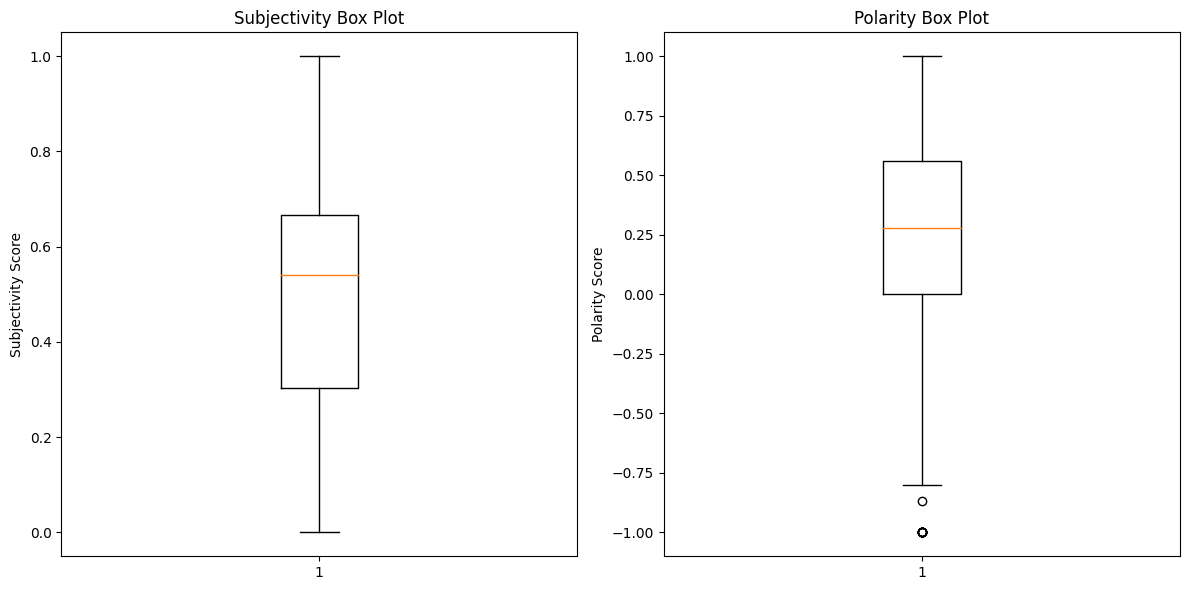

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for subjectivity and polarity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['subjectivity'])
plt.title('Subjectivity Box Plot')
plt.ylabel('Subjectivity Score')

plt.subplot(1, 2, 2)
plt.boxplot(data['polarity'])
plt.title('Polarity Box Plot')
plt.ylabel('Polarity Score')

plt.tight_layout()
plt.show()

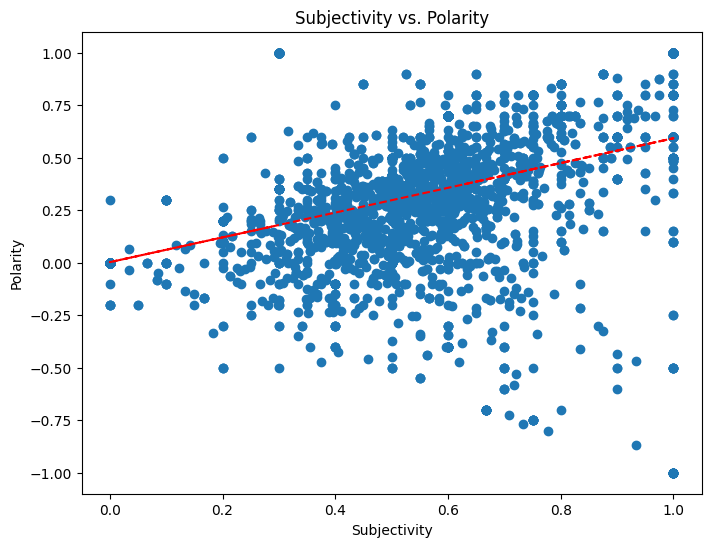

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['subjectivity'], data['polarity'])
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Subjectivity vs. Polarity')

# Add a trend line
z = np.polyfit(data['subjectivity'], data['polarity'], 1)
p = np.poly1d(z)
plt.plot(data['subjectivity'], p(data['subjectivity']), "r--")

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Overall Sentiment Score: 0.2920751390098003


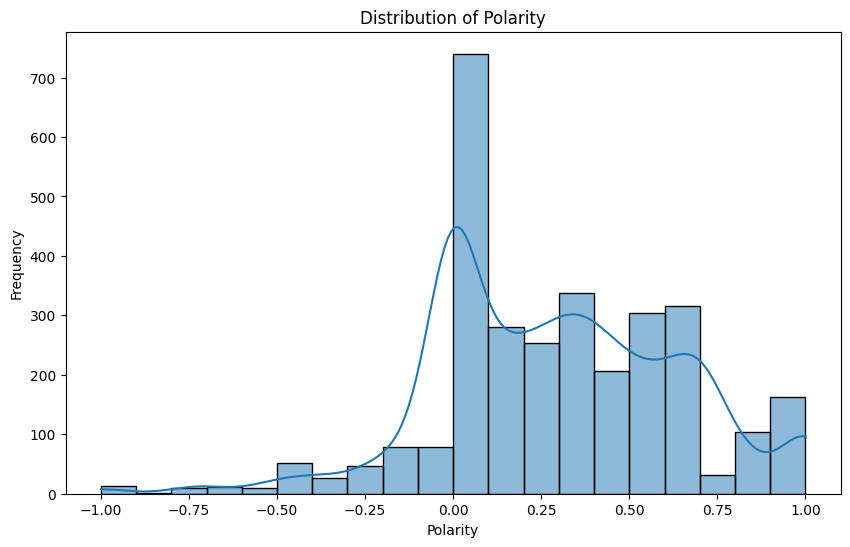

In [ ]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the CSV file
data = pd.read_csv('iphone.csv')  # Replace with your filename

# Function to clean and normalize text
def clean_text(text):
    # Check if the text is a string before applying regex
    if isinstance(text, str):
        text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
        text = text.lower()  # Convert text to lowercase
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    else:
        # Handle non-string values (e.g., return empty string or NaN)
        return ''

# Apply text cleaning
data['cleaned_review'] = data['reviewDescription'].apply(lambda x: clean_text(str(x))) # Convert to string type before applying the function

# Function to calculate polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to get polarity and subjectivity
data[['polarity', 'subjectivity']] = data['cleaned_review'].apply(lambda x: pd.Series(get_sentiment(x)))

# Calculate the sentiment score as the average polarity
sentiment_score = data['polarity'].mean()

# Print the sentiment score
print(f"Overall Sentiment Score: {sentiment_score}")

# Optionally, you can display a bar graph for polarity distribution
plt.figure(figsize=(10,6))
sns.histplot(data['polarity'], kde=True, bins=20)
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np
# Calculate the Pearson correlation coefficient between subjectivity and polarity
correlation = data['subjectivity'].corr(data['polarity'], method='pearson')

# Print the correlation coefficient
print(f"Pearson correlation between subjectivity and polarity: {correlation}")

# Calculate the covariance between subjectivity and polarity
covariance = np.cov(data['subjectivity'], data['polarity'])[0, 1]

# Print the covariance
print(f"Covariance between subjectivity and polarity: {covariance}")

Pearson correlation between subjectivity and polarity: 0.4892510138640158
Covariance between subjectivity and polarity: 0.051175166740379134


In [ ]:
import pandas as pd
from collections import Counter

# Assuming 'data' DataFrame and 'cleaned_review' column are available from the preceding code
# Create a list of words from the 'cleaned_review' column
word_list = [word for row in data['cleaned_review'] for word in row.split()]

word_freq = Counter(word_list)
top_10_words = word_freq.most_common(10)

# Create a DataFrame for the word frequency table
word_freq_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

print(word_freq_df)

      Word  Frequency
0    phone       1606
1   iphone       1195
2     good        923
3  battery        759
4   camera        590
5    apple        501
6  product        490
7     like        409
8   amazon        380
9      new        374


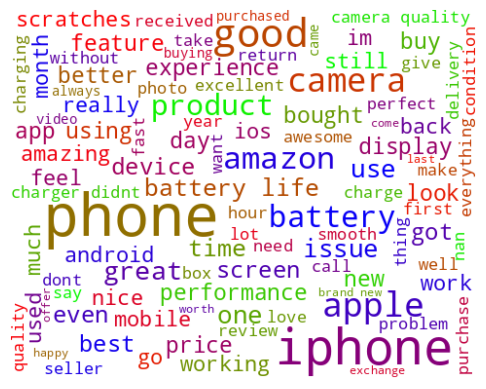

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
#rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
#                    columns=['Word', 'Frequency'])
wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(word_list)) # Fixed: Join the words in the word_list directly

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

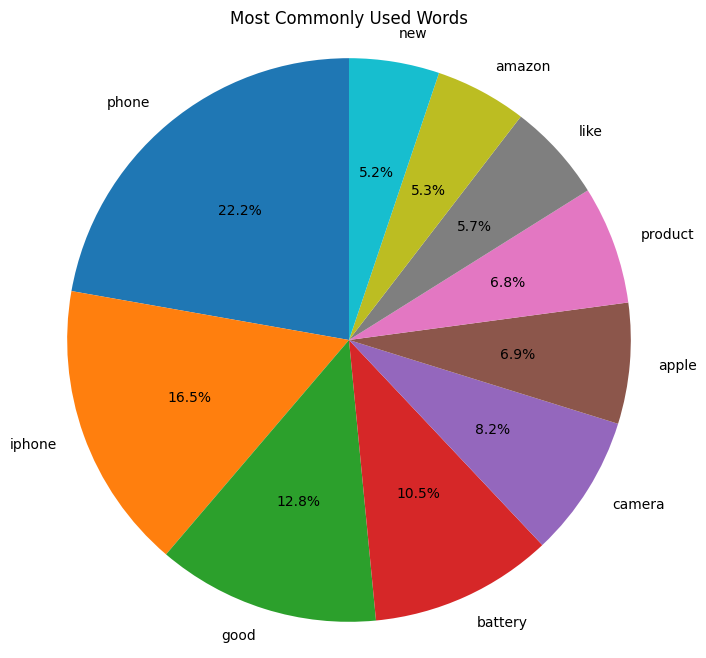

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'word_freq_df' from the preceding code contains the word frequencies
# Get the top 10 words and their frequencies
words = word_freq_df['Word'].tolist()
frequencies = word_freq_df['Frequency'].tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequencies, labels=words, autopct='%1.1f%%', startangle=90)
plt.title('Most Commonly Used Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Accuracy: 0.499184339314845
Confusion Matrix:
[[181 133]
 [174 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       314
           1       0.48      0.42      0.45       299

    accuracy                           0.50       613
   macro avg       0.50      0.50      0.49       613
weighted avg       0.50      0.50      0.50       613



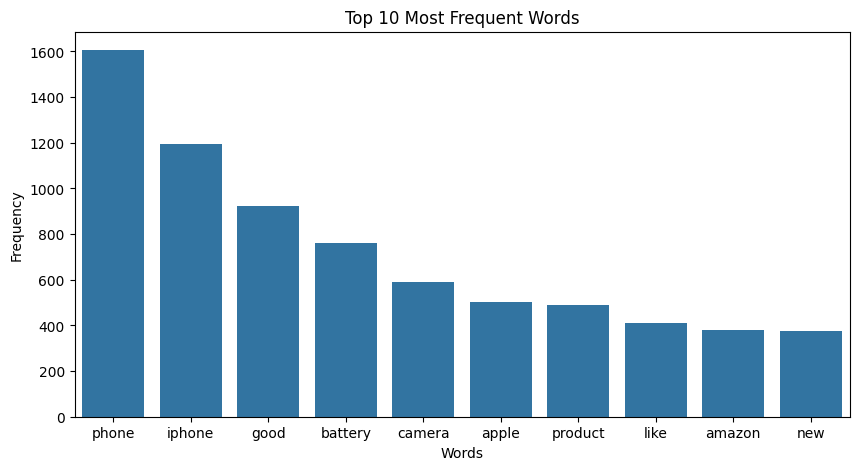

In [ ]:
data['cleaned_review'] = data['reviewDescription'].apply(clean_text)

# Tokenize the cleaned text
data['tokenized_review'] = data['cleaned_review'].apply(lambda x: nltk.word_tokenize(x))

# Vectorizing the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()

# For this example, let's assume you have sentiment labels, if not you can create random ones
# For now, let's assume random sentiment labels (positive: 1, negative: 0)
import numpy as np
data['sentiment'] = np.random.choice([0, 1], size=len(data))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)

# Train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate sentiment analysis statistics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print statistics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Generate a bar graph of top 10 words
word_freq = Counter([word for sublist in data['tokenized_review'] for word in sublist])
top_10_words = word_freq.most_common(10)

# Plotting the bar graph
words, freqs = zip(*top_10_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs))
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
positive_count = sum(1 for prediction in y_pred if prediction == 1)
negative_count = sum(1 for prediction in y_pred if prediction == 0)
neutral_count = 0  # You might need to define a neutral label if applicable

print(f"Positive Count: {positive_count}")
print(f"Negative Count: {negative_count}")
print(f"Neutral Count: {neutral_count}")

Positive Count: 304
Negative Count: 309
Neutral Count: 0


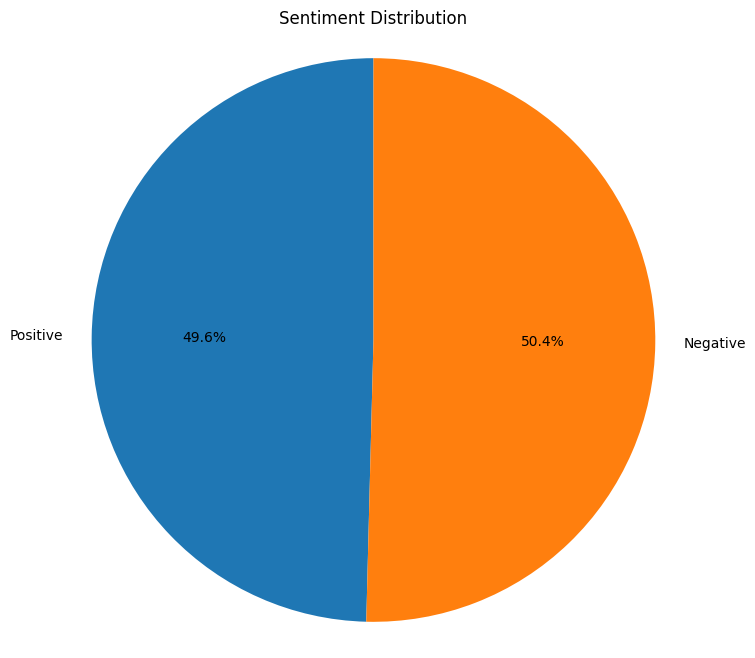

In [ ]:
import matplotlib.pyplot as plt
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# prompt: use smote to balance the data in the target variable sentiment and then perform sentiment analysis using random forest model. give the model summary.

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and target (y)
X = data['cleaned_review']
y = data['sentiment']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(vectorizer.fit_transform(X).toarray(), y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model summary
print("Model Summary after SMOTE and Random Forest:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Summary after SMOTE and Random Forest:
Accuracy: 0.5315457413249212
Confusion Matrix:
 [[177 145]
 [152 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54       322
           1       0.52      0.51      0.52       312

    accuracy                           0.53       634
   macro avg       0.53      0.53      0.53       634
weighted avg       0.53      0.53      0.53       634



In [ ]:
# prompt: perform sentiment analysis using svm algorithm and give summary

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data' DataFrame and 'cleaned_review' column are available from the preceding code

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42
)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels
svm_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Summary of SVM Sentiment Analysis
print("\nSummary of Sentiment Analysis using SVM:")
print("The SVM classifier achieved an accuracy of {:.2f}% on the test data.".format(accuracy * 100))
print("The confusion matrix and classification report provide further insights into the model's performance.")
# You can add more details to the summary based on your specific analysis needs
# For example:
# - Mention the specific kernel used.
# - Discuss the model's performance on different sentiment classes.
# - Provide insights into potential areas of improvement.


Accuracy: 0.49592169657422513
Confusion Matrix:
[[132 171]
 [138 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       303
           1       0.50      0.55      0.53       310

    accuracy                           0.50       613
   macro avg       0.50      0.50      0.49       613
weighted avg       0.50      0.50      0.49       613


Summary of Sentiment Analysis using SVM:
The SVM classifier achieved an accuracy of 49.59% on the test data.
The confusion matrix and classification report provide further insights into the model's performance.


In [ ]:
# prompt: perform sentiment analysis using logistic regression and give summary

from sklearn.linear_model import LogisticRegression

# Assuming 'data' DataFrame and 'cleaned_review' column are available from the preceding code

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42
)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
lr_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = lr_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Summary of Logistic Regression Sentiment Analysis
print("\nSummary of Sentiment Analysis using Logistic Regression:")
print("The Logistic Regression classifier achieved an accuracy of {:.2f}% on the test data.".format(accuracy * 100))
print("The confusion matrix and classification report provide further insights into the model's performance.")
# You can add more details to the summary based on your specific analysis needs
# For example:
# - Discuss the model's performance on different sentiment classes.
# - Provide insights into potential areas of improvement.


Accuracy: 0.5089722675367048
Confusion Matrix:
[[135 168]
 [133 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       303
           1       0.51      0.57      0.54       310

    accuracy                           0.51       613
   macro avg       0.51      0.51      0.51       613
weighted avg       0.51      0.51      0.51       613


Summary of Sentiment Analysis using Logistic Regression:
The Logistic Regression classifier achieved an accuracy of 50.90% on the test data.
The confusion matrix and classification report provide further insights into the model's performance.
